# 推測統計
推測統計では、標本ではなく母集団に興味がある<br>
→記述統計は、取得できた標本に興味がある

In [48]:
# ライブラリのインストール
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [49]:
# 使用するデータのロード
df = sns.load_dataset("tips")
df["tip_rate"] = df["tip"] / df["total_bill"]  ## 支払に対するチップの割合
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 標本分布
* 標本分布の中身は確率的に変動する
* 標本統計量も同様に確率的に変動する値(つまり確率変数)
* 標本統計量が従う確率分布を標本分布と呼ぶ

## 推定量
* 母数の推定に使う標本統計量
* 実際の値を推定値という

## 不偏性(unbiasedness)
* 推定量が"平均的に"母数と一致する場合、その推定量は「不偏性がある」という
* 普遍性がある推定量を、不偏推定量(unbiased estimator)と呼ぶ
* 確率の文脈では、平均のことを期待値という

## 大数の法則
* 標本平均と母集団平均の間の関係
* サンプルサイズ$n$を大きくすると、標本平均$\bar{x}$が、母平均$\mu$に限りなく近づく

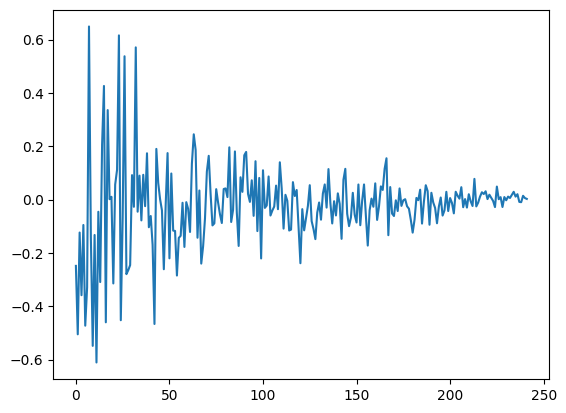

In [54]:
# 大数の法則の確認
# サンプルサイズを2〜244まで増やしていき、その際の標本誤差を調べる
sampled_average_list = []
for n in range(len(df) - 2):
    sampled_average_list.append(df["tip"].sample(n + 2).mean())


def get_error(sampled, df, column):
    mu = df[column].mean()
    return sampled - mu


y = get_error(sampled_average_list, df, "tip")
plt.plot(y)

## 平均の標本分布
* 平均の標本分布の平均は、母平均と同じ$\mu$になる
* 平均の標本分布の分散は、母分散を$n$で割った値($\sigma^2/n$)になる

In [50]:
# 元データの平均と分散をあらかじめみておく
print(f"母平均:{df['tip'].mean()}")
print(f"母分散:{df['tip'].var()}")
sigma = df["tip"].var()

母平均:2.99827868852459
母分散:1.914454638062471


In [51]:
sampled_average_list = []
n = 50
for _ in range(1000):
    sampled_average_list.append(df["tip"].sample(n).mean())
print(f"標本平均の平均:{np.mean(sampled_average_list)}")
print(f"標本平均の分散:{np.var(sampled_average_list)}")
print(f"分散を近似値で計算：{sigma/n}")

標本平均の平均:3.0077128
標本平均の分散:0.030816415916160002
分散を近似値で計算：0.03828909276124942


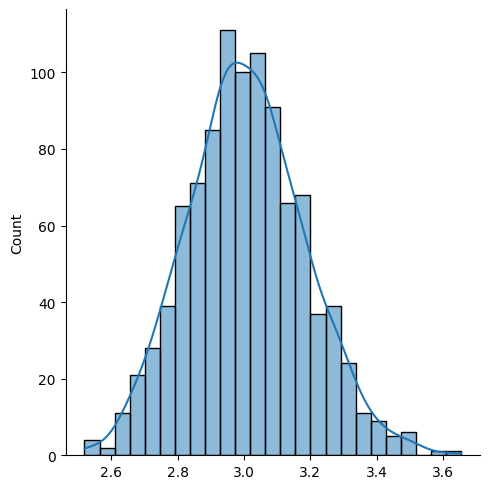

In [53]:
sns.displot(sampled_average_list, kde=True)

## 不偏分散
* 特徴
  * 母分散の不偏推定量
  * 不偏分散は、分散の式に置いて、$n$ではなく、$n-1$で割った値
* 不偏分散の算出
  * stats.tvar(a)
  * np.var(a, ddof=1)

In [55]:
stats.tvar(df["tip"])

1.914454638062471

In [56]:
np.var(df["tip"], ddof=1)

1.914454638062471

In [57]:
np.var(df["tip"])

1.9066085124966412

## 不偏分散の平方根の不偏性
* 特徴
  * 不偏分散の平方根は母集団の標準偏差$\sigma$の不偏推定量にはならない
  * 不偏分散の平方根を「不偏標準偏差」と呼ぶのは間違い
* 不偏分散の平方根の算出
  * stats.tstd(a)
  * np.std(a, ddof=1)

In [58]:
stats.tstd(df["tip"])

1.3836381890011822

In [59]:
np.std(df["tip"], ddof=1)

1.3836381890011822

### 不偏分散の"不偏性"を確認してみよう
* データセットを母集団と見立てて、50個の標本を100回抽出して、標本の分散と不偏分散の平均がどうなるのか見てみよう

In [60]:
# 元データの平均と分散をあらかじめみておく
print(f"母平均:{df['tip'].mean()}")
print(f"母分散:{df['tip'].var()}")
sigma = df["tip"].var()

母平均:2.99827868852459
母分散:1.914454638062471


In [69]:
sampled_var_list = []
sampled_tvar_list = []
n = 50
for _ in range(1000):
    sampled_var_list.append(np.var((df["tip"].sample(n))))
    sampled_tvar_list.append(stats.tvar((df["tip"].sample(n))))
print(f"標本分散の平均: {np.mean(sampled_var_list)}")
print(f"不偏分散の平均: {np.mean(sampled_tvar_list)}")

標本分散の平均: 1.8748514552400002
不偏分散の平均: 1.890704379510204
